In [1]:
# Importing Libraries
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup

# Importing selenium webdriver 
from selenium import webdriver

# Importing required Exceptions which needs to handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

# importing regex
import re

In [2]:
driver=webdriver.Chrome(executable_path="C:\\Users\\HP\\Downloads\\chromedriver.exe")

# Question1. 
Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [3]:
driver.get(' https://www.amazon.in')

In [4]:
#locating the search bar
product_vertical=driver.find_element_by_xpath('//select[@class="nav-search-dropdown searchSelect nav-progressive-attrubute nav-progressive-search-dropdown"]')
product_vertical.send_keys("furniture")

In [5]:
search_bar = driver.find_element_by_id("twotabsearchtextbox")    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("chair")                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//span[@id="nav-search-submit-text"]')       # Locating search_button by xpath
search_button.click()

# Question-2
In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [6]:
Brand_Product_Name=[]
Rating=[]
No_of_Ratings=[]
Price=[]
Return_or_Exchange=[]
Expected_Delivery=[]
Availability=[]
Product_URL=[]

In [7]:
start_page=0
end_page=3
for page in range(start_page,end_page+1): 
    
    prod=driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base a-text-normal']")
    for l in prod:
        Brand_Product_Name.append(l.text)
    price=driver.find_elements_by_xpath("//span[@class='a-price']")
    for l in price:
        Price.append(l.text)
    delivery=driver.find_elements_by_xpath("//span[@class='a-text-bold']")
    for l in delivery:
        Expected_Delivery.append(l.text)     
    for i in driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']"):#scraping the path of url for each item
        Product_URL.append(i.get_attribute("href"))
    
    nxt_button=driver.find_elements_by_xpath("//li[@class='a-last']/a")
    driver.get(nxt_button[page].get_attribute('href'))

IndexError: list index out of range

# Question-3
Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [8]:
driver.get('https://images.google.com/?gws_rd=ssl')

In [9]:
search_bar = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by xpath
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("fruits")                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')       # Locating search_button by xpath
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
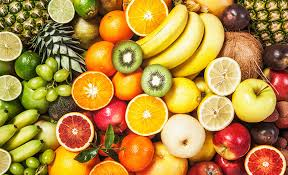
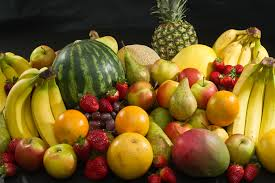
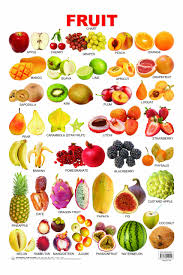
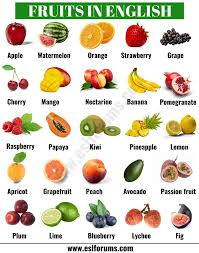
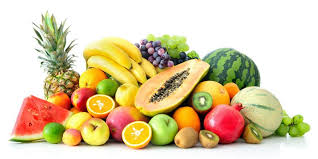
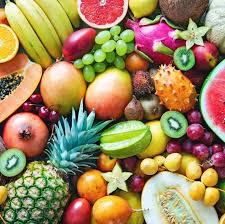
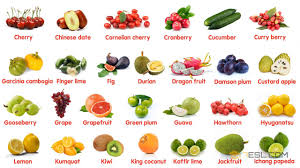
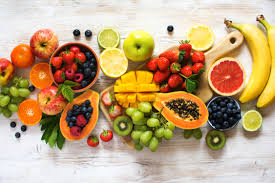
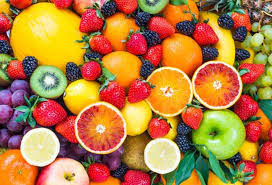
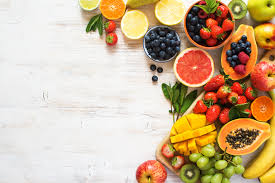

In [10]:
Image_Fruits=[]
fruitimage=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in fruitimage:
    Image_Fruits.append(i.get_attribute('src'))
Image_Fruits[0:10]

In [11]:
driver=webdriver.Chrome(executable_path="C:\\Users\\HP\\Downloads\\chromedriver.exe")
driver.get('https://images.google.com/?gws_rd=ssl')
search_bar = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by xpath
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("cars")                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')       # Locating search_button by xpath
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
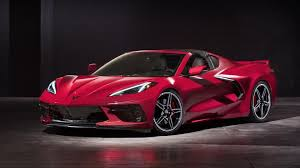
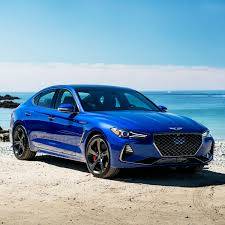
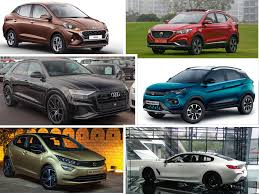
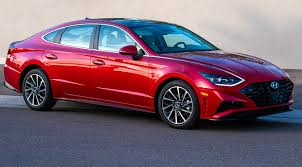
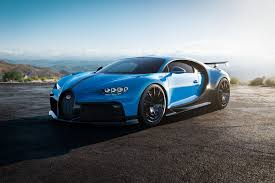
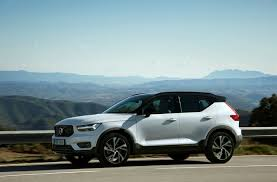
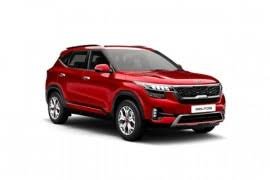
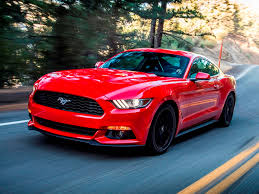
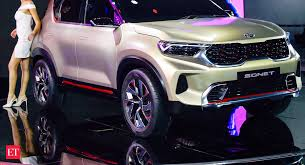
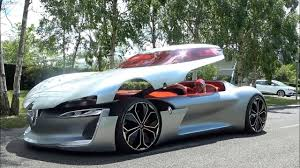

In [12]:
Image_Cars=[]
carimage=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in carimage:
    Image_Cars.append(i.get_attribute('src'))
Image_Cars[0:10]

In [13]:
driver=webdriver.Chrome(executable_path="C:\\Users\\HP\\Downloads\\chromedriver.exe")
driver.get('https://images.google.com/?gws_rd=ssl')
search_bar = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by xpath
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("Machine Learning")                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')       # Locating search_button by xpath
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
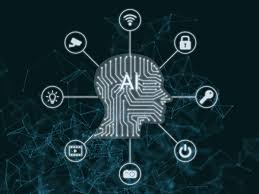
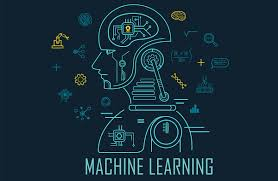
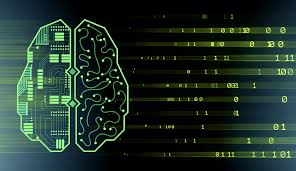
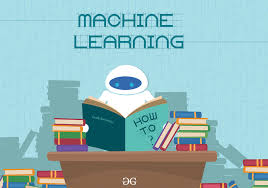
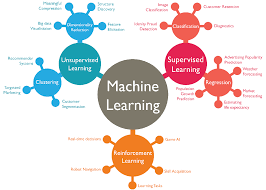
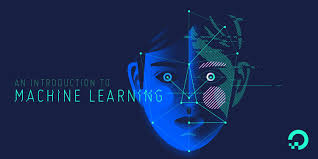
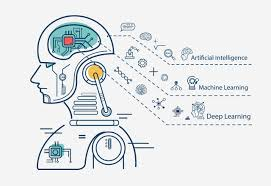
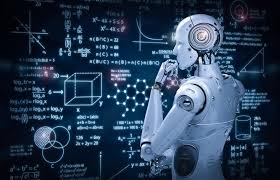
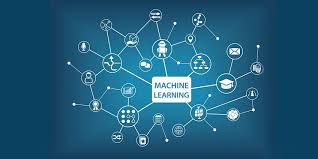
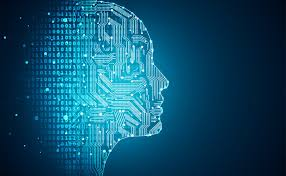

In [14]:
Image_ML=[]
mlimage=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in mlimage:
    Image_ML.append(i.get_attribute('src'))
Image_ML[0:10]

In [15]:
print(len(Image_Fruits),len(Image_Cars),len(Image_ML))

400 400 400


In [16]:
import pandas as pd
Images=pd.DataFrame({})
Images['Image_Fruits']=Image_Fruits[0:100]
Images['Image_Cars']=Image_Cars[0:100]
Images['Image_ML']=Image_ML[0:100]
Images

,Image_Fruits,Image_Cars,Image_ML
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
...,...,...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
96,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
97,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
98,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


# Question-4  
Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [17]:
url="https://www.flipkart.com/"
driver.get(url)

In [18]:
#locating the search bar
search_bar=driver.find_element_by_class_name('_3704LK')
search_bar.clear()
search_bar.send_keys('Redimi 9')

In [21]:
search_button=driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()

In [22]:
Brand_Name_Smartphone_Name_Color=[]
Ram_Rom=[]
Primary_Secondary_Camera=[]
Display_Size=[]
Processor_Processor_Cores=[]
Battery_Capacity=[]
Price=[]
Product_Url=[]

In [23]:
phone=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in phone:
    if i.text is None :
        Brand_Name_Smartphone_Name_Color.append("--") 
    else:
        Brand_Name_Smartphone_Name_Color.append(i.text)
Brand_Name_Smartphone_Name_Color[0:2]

['Redmi 9 (CarbonBlack, 128 GB)', 'Redmi 9 (Sporty Orange, 128 GB)']

In [24]:
ram_rom=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")
for i in ram_rom:
    if i.text is None :
        Ram_Rom.append("--") 
    else:
        Ram_Rom.append(i.text)
Ram_Rom[0:2]

['4 GB RAM | 128 GB ROM', '4 GB RAM | 128 GB ROM']

In [25]:
cam=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")
for i in cam:
    if i.text is None :
        Primary_Secondary_Camera.append("--") 
    else:
        Primary_Secondary_Camera.append(i.text)

Primary_Secondary_Camera[0:2]

['13MP Rear Camera', '13MP Rear Camera']

In [26]:
dis=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[2]")
for i in dis:
    if i.text is None :
        Display_Size.append("--") 
    else:
        Display_Size.append(i.text)

Display_Size[0:2]

['16.59 cm (6.53 inch) Display', '16.59 cm (6.53 inch) HD+ Display']

In [27]:
pro=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[5]")
for i in pro:
    if i.text is None :
        Processor_Processor_Cores.append("--") 
    else:
        Processor_Processor_Cores.append(i.text)

Processor_Processor_Cores[0:2]

['1 Year Manufacturer Warranty', '1 Year ManuFacturer Warrenty']

In [28]:
battery=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[4]")
for i in battery:
    if i.text is None :
        Battery_Capacity.append("--") 
    else:
        Battery_Capacity.append(i.text)

Battery_Capacity[0:2]

['5000 mAh Battery', '5000 mAh Battery']

In [29]:
price=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for i in price:
    if i.text is None :
        Price.append("--") 
    else:
        Price.append(i.text)

Price[0:2]

['₹10,585', '₹10,323']

In [30]:
url=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
for i in url:
    Product_Url.append(i.get_attribute('href'))
Product_Url[0:5]

['https://www.flipkart.com/redmi-9-carbonblack-128-gb/p/itm5b0fa0fcbf29d?pid=MOBFVGJYZ22CM5ZG&lid=LSTMOBFVGJYZ22CM5ZGRBPZ3H&marketplace=FLIPKART&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=242de67b-ca4c-4ee8-a11a-b59970848a04.MOBFVGJYZ22CM5ZG.SEARCH&ppt=hp&ppn=homepage&ssid=89m55kre5s0000001612715250094&qH=6562636dd35b8756',
 'https://www.flipkart.com/redmi-9-sporty-orange-128-gb/p/itmab450ea12f428?pid=MOBFVFN2JZ4UDPGF&lid=LSTMOBFVFN2JZ4UDPGFL5A8VL&marketplace=FLIPKART&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=242de67b-ca4c-4ee8-a11a-b59970848a04.MOBFVFN2JZ4UDPGF.SEARCH&ppt=hp&ppn=homepage&ssid=89m55kre5s0000001612715250094&qH=6562636dd35b8756',
 'https://www.flipkart.com/redmi-9-sky-blue-128-gb/p/itm4fb151383983b?pid=MOBFV5FPGQPG9CEZ&lid=LSTMOBFV5FPGQPG9CEZCP2OTG&marketplace=FLIPKART&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=242de67b-ca4c-4ee8-a11a-b59970848a04.MOBFV5FPGQPG9CEZ.SEARCH&ppt=hp&ppn=homepage&ssid=89m55kre5s0000001612715250094&

In [31]:
#creating a dataframe
import pandas as pd
Phones=pd.DataFrame({})
Phones['Brand_Name_Smartphone_Name_Color']=Brand_Name_Smartphone_Name_Color
Phones['Ram_Rom']=Ram_Rom
Phones['Primary_Secondary_Camera']=Primary_Secondary_Camera
Phones['Display_Size']=Display_Size
Phones['Processor_Processor_Cores']=Processor_Processor_Cores
Phones['Battery_Capacity']=Battery_Capacity
Phones['Price']=Price
Phones['Product_Url']=Product_Url
Phones

,Brand_Name_Smartphone_Name_Color,Ram_Rom,Primary_Secondary_Camera,Display_Size,Processor_Processor_Cores,Battery_Capacity,Price,Product_Url
0,"Redmi 9 (CarbonBlack, 128 GB)",4 GB RAM | 128 GB ROM,13MP Rear Camera,16.59 cm (6.53 inch) Display,1 Year Manufacturer Warranty,5000 mAh Battery,"₹10,585",https://www.flipkart.com/redmi-9-carbonblack-1...
1,"Redmi 9 (Sporty Orange, 128 GB)",4 GB RAM | 128 GB ROM,13MP Rear Camera,16.59 cm (6.53 inch) HD+ Display,1 Year ManuFacturer Warrenty,5000 mAh Battery,"₹10,323",https://www.flipkart.com/redmi-9-sporty-orange...
2,"Redmi 9 (Sky Blue, 128 GB)",4 GB RAM | 128 GB ROM,13MP + 8MP | 8MP Front Camera,16.59 cm (6.53 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Battery,"₹10,217",https://www.flipkart.com/redmi-9-sky-blue-128-...
3,"Redmi 9 (Sky Blue, 64 GB)",4 GB RAM | 64 GB ROM,13MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Battery,"₹9,277",https://www.flipkart.com/redmi-9-sky-blue-64-g...
4,"Redmi 9 (Carbon Black, 64 GB)",4 GB RAM | 64 GB ROM,13MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Battery,"₹9,333",https://www.flipkart.com/redmi-9-carbon-black-...
5,"Redmi 9 (Sporty Orange, 64 GB)",4 GB RAM | 64 GB ROM,13MP + 8MP | 8MP Front Camera,16.59 cm (6.53 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Battery,"₹9,334",https://www.flipkart.com/redmi-9-sporty-orange...
6,"Redmi 9i (Nature Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,MediaTek Helio G25 Processor,5000 mAh Lithium Polymer Battery,"₹8,299",https://www.flipkart.com/redmi-9i-nature-green...
7,"Redmi 9 Prime (Mint Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP Rear Camera | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,MediaTek Helio G80 Processor,5020 mAh Battery,"₹9,499",https://www.flipkart.com/redmi-9-prime-mint-gr...
8,"Redmi 9i (Midnight Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,MediaTek Helio G25 Processor,5000 mAh Lithium Polymer Battery,"₹8,299",https://www.flipkart.com/redmi-9i-midnight-bla...
9,"Redmi 9 Prime (Sunrise Flare, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,13MP Rear Camera | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,MediaTek Helio G80 Processor,5020 mAh Battery,"₹9,499",https://www.flipkart.com/redmi-9-prime-sunrise...


# Question-5 
Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [32]:
driver=webdriver.Chrome(executable_path="C:\\Users\\HP\\Downloads\\chromedriver.exe")

In [33]:
# opening google maps
driver.get("https://www.google.co.in/maps")
time.sleep(3)

city = input('Enter City Name : ')                                         # Enter city to be searched
search = driver.find_element_by_id("searchboxinput")                       # locating search bar
search.clear()                                                             # clearing search bar
time.sleep(2)
search.send_keys(city)                                                     # entering values in search bar
button = driver.find_element_by_id("searchbox-searchbutton")               # locating search button
button.click()                                                             # clicking search button
time.sleep(3)

try:
    url_string = driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

Enter City Name : New Delhi
URL Extracted:  https://www.google.co.in/maps/place/New+Delhi,+Delhi/@28.5272803,77.0688962,11z/data=!3m1!4b1!4m5!3m4!1s0x390cfd5b347eb62d:0x52c2b7494e204dce!8m2!3d28.6139391!4d77.2090212
Latitude = 28.5272803, Longitude = 77.0688962


# Question-6
Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [34]:
driver.get('https://trak.in/')

In [35]:
search_button = driver.find_element_by_xpath('//li[@id="menu-item-51510"]/a').get_attribute('href')
driver.get(search_button)

In [36]:
fund_dict = {}
fund_dict['Date'] = []
fund_dict['Startup Name'] = []
fund_dict['Industry/Vertical'] = []
fund_dict['Sub-Vertical'] = []
fund_dict['Location'] = []
fund_dict['Investor'] = []
fund_dict['Investment Type'] = []
fund_dict['Amount(in USD)'] = []

In [37]:
for i in range(48,51):
    driver.find_element_by_xpath('//div[@id="tablepress-{}_wrapper"]/div/label/select/option[4]'.format(i)).click()

    # Date
    dt = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[2]'.format(i))
    for d in dt:
        fund_dict['Date'].append(d.text)

    # Startup Name
    sn = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[3]'.format(i))
    for n in sn:
        fund_dict['Startup Name'].append(n.text)
    
    # Industry/Vertical
    ind = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[4]'.format(i))
    for n in ind:
        fund_dict['Industry/Vertical'].append(n.text)
    
    # Sub-Vertical
    sv = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[5]'.format(i))
    for s in sv:
        fund_dict['Sub-Vertical'].append(s.text)

    # Location
    loc = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[6]'.format(i))
    for l in loc:
        fund_dict['Location'].append(l.text)
    
    # Investor
    inv = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[7]'.format(i))
    for n in inv:
        fund_dict['Investor'].append(n.text)
    
    # Investment Type
    invt = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[8]'.format(i))
    for n in invt:
        fund_dict['Investment Type'].append(n.text)
    
    # Amount
    amt = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[9]'.format(i))
    for a in amt:
        fund_dict['Amount(in USD)'].append(a.text)
    
fund_df = pd.DataFrame(fund_dict)
fund_df

,Date,Startup Name,Industry/Vertical,Sub-Vertical,Location,Investor,Investment Type,Amount(in USD)
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


# Question-7 
Write a program to scrap all the available details of top 10 gaming laptops from digit.in.

In [38]:
driver.get('https://www.digit.in/')

In [39]:
#clickng on top 10 option 
top_10=driver.find_element_by_xpath("//div[@class='menu']/ul/li[3]/a")
top_10.click()

#clicking on laptops option
laptops=driver.find_element_by_xpath("//ul[@id='top10list']/li[2]")
laptops.click()

#best gaming laptops link
best_gaming=driver.find_element_by_xpath("//div[@id='laptops']/a[3]")
driver.get(best_gaming.get_attribute('href'))

#intialising lists
name = []
price = []
OS = []
display = []
processor = []
HDD = []
RAM = []
weight = []
dimension = []
GPU = []

#names
names=driver.find_elements_by_xpath("//div[@class='right-container']/div/a/h3")
for i in names:
    name.append(i.text)
    
#os
os=driver.find_elements_by_xpath("//div[@class='product-detail']/div/ul/li[1]/div/div")
for i in os:
    OS.append(i.text)
    
#display
displays=driver.find_elements_by_xpath("//div[@class='product-detail']/div/ul/li[2]/div/div")
for i in displays:
    display.append(i.text)
    
#processor
processors=driver.find_elements_by_xpath("//div[@class='product-detail']/div/ul/li[3]/div/div")
for i in processors:
    processor.append(i.text)
processor

#memory
memories=driver.find_elements_by_xpath("//div[@class='Spcs-details'][1]/table/tbody/tr[6]/td[1]")#list of specificaion name
memories_spec=driver.find_elements_by_xpath("//div[@class='Spcs-details'][1]/table/tbody/tr[6]/td[3]")#values of specifiations 
for i in range(len(memories)):
        if memories[i].text=='Memory':
            HDD.append(memories_spec[i].text.split('/')[0])
            RAM.append(memories_spec[i].text.split('/')[1])
        else:
            HDD.append('No details available')#append no details as value for memory is missing in some of the laptops
            RAM.append('No details available')#append no details as value for memory is missing in some of the laptops

#weight
weights=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr/td[1]")#list of specificaion name
weight_spec=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr/td[3]")#values of specifiations
for i in range(len(weights)):
        if weights[i].text=='Weight':
            weight.append(weight_spec[i].text)
        
#dimension
dimension=[]
dims=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr/td[1]")#list of specificaion name
dims_spec=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr/td[3]")#values of specifiations
for i in range(len(dims)):
        if dims[i].text=='Dimension':
            dimension.append(dims_spec[i].text)

#graphical processor
GPUs=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr/td[1]")#list of specificaion name
GPUs_spec=driver.find_elements_by_xpath("//div[@class='Spcs-details']/table/tbody/tr/td[3]")#values of specifiations
for i in range(len(GPUs)):
        if GPUs[i].text=='Graphics Processor':
            GPU.append(GPUs_spec[i].text)
        
full_specs=[]
urls=driver.find_elements_by_xpath("//div[@class='full-specs']/span")#getting the url of full specs links
for i in urls:
    if i.get_attribute('data-href'):
        full_specs.append(i.get_attribute('data-href'))
    
for i in full_specs:#iterating throug every laptops full specs' page
    driver.get(i)
    try:
        prices=driver.find_element_by_xpath("//div[@class='Block-price']/b")
        price.append(prices.text)
    except NoSuchElementException:#exception handling for no price details
        price.append("No details available")
        
df=pd.DataFrame({"Name":name,
                "Price":price,
                "OS":OS,
                "Display":display,
                "HDD":HDD,
                 "RAM":RAM,
                "processor":processor,
                "weight":weight,
                "Dimension":dimension,
                "Graphical processor":GPU})
df

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//ul[@id='top10list']/li[2]"}
  (Session info: chrome=88.0.4324.146)
